In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from IPython.display import display
from pandas import ExcelWriter

## Load the Data

In [2]:
wind_data = pd.read_csv('la-haute-borne-data-2013-2016.csv',sep=';')

In [3]:
# Defining the columns to keep
cols_2_keep = ['Date_time', 'P_avg', 'P_min', 'P_max', 'P_std', 'Ws1_avg', 'Ws1_min', 'Ws1_max', 'Ws1_std', 'Ws2_avg', 'Ws2_min', \
               'Ws2_max', 'Ws2_std', 'Ws_avg', 'Ws_min', 'Ws_max', 'Ws_std']

# process the data
turbines = {}
index = 1
for name in wind_data.Wind_turbine_name.unique():
    # Splitting data based on wind turbine (1-4)
    turbine_name = 'turbine_{}'.format(index)
    turbine_data = wind_data.loc[wind_data['Wind_turbine_name'] == name]
    
    # Cleaning each turbine data by removing Nan's in the wind speed column
    turbine_data_clean = turbine_data[np.isfinite(turbine_data['Ws1_avg'])]
    turbines[turbine_name] = turbine_data_clean.loc[:, cols_2_keep]
    index += 1

In [4]:
# Converting date_time column to datetime variable and picking out day,month,hour,minute and year
for key in turbines.keys():
    turbines[key]['Date_time'] = pd.to_datetime(turbines[key]['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
    turbines[key]['Day'] = turbines[key]['Date_time'].dt.day;
    turbines[key]['Month'] = turbines[key]['Date_time'].dt.month;
    turbines[key]['Hour'] = turbines[key]['Date_time'].dt.hour;
    turbines[key]['Minute'] = turbines[key]['Date_time'].dt.minute;
    turbines[key]['Year'] = turbines[key]['Date_time'].dt.year;

# Sorting the rows based on the date time
for key in turbines.keys():
    turbine_sorted = turbines[key].sort_values(by = 'Date_time')
    turbines[key] = turbine_sorted.set_index('Date_time')
    
turbines['turbine_1'].head()

,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [5]:
# use the intersection of time of all 4 turbines and keep the common times
idx = turbines['turbine_1'].index.intersection(turbines['turbine_2'].index)
idx2 = turbines['turbine_3'].index.intersection(idx)
idx3 = turbines['turbine_4'].index.intersection(idx2)

for key in turbines.keys():
    turbines[key] = turbines[key].loc[idx3]
    
print (len(turbines['turbine_1']))
print (len(turbines['turbine_2']))
print (len(turbines['turbine_3']))
print (len(turbines['turbine_4']))
turbines['turbine_1'].head()

207789
207789
207789
207789


,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [6]:
list(turbines['turbine_1'])

['P_avg',
 'P_min',
 'P_max',
 'P_std',
 'Ws1_avg',
 'Ws1_min',
 'Ws1_max',
 'Ws1_std',
 'Ws2_avg',
 'Ws2_min',
 'Ws2_max',
 'Ws2_std',
 'Ws_avg',
 'Ws_min',
 'Ws_max',
 'Ws_std',
 'Day',
 'Month',
 'Hour',
 'Minute',
 'Year']

In [24]:
np.any(np.isnan(turbines['turbine_4']))

False

## Getting the X matrix as 70% of the features (sequentially)

### Right now, use turbine 1 to predict turbine 2, 3, 4


In [7]:
# Getting X vector from turbine 1 data sequentially
x_turb_1_train = turbines['turbine_1'][0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['P_avg','Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbines['turbine_1'][145452:]
x_turb_1_test = x_turb_1_test.loc[:,['P_avg','Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)
x_train

array([[1.0726500e+03, 8.9600000e+00, 2.0120000e+03, ..., 3.1000000e+01,
        2.3000000e+01, 0.0000000e+00],
       [1.0614301e+03, 8.8900003e+00, 2.0120000e+03, ..., 3.1000000e+01,
        2.3000000e+01, 1.0000000e+01],
       [1.1447900e+03, 9.1899996e+00, 2.0120000e+03, ..., 3.1000000e+01,
        2.3000000e+01, 2.0000000e+01],
       ...,
       [4.5164999e+02, 6.4099998e+00, 2.0150000e+03, ..., 2.2000000e+01,
        1.0000000e+00, 1.0000000e+01],
       [4.1857001e+02, 6.1900001e+00, 2.0150000e+03, ..., 2.2000000e+01,
        1.0000000e+00, 2.0000000e+01],
       [4.5938000e+02, 6.3699999e+00, 2.0150000e+03, ..., 2.2000000e+01,
        1.0000000e+00, 3.0000000e+01]])

In [8]:
# Getting Y vector from turbine 2 data
y_turb_2_train = turbines['turbine_2'][0:145452]
y_turb_2_train = y_turb_2_train.loc[:,['P_avg']]
y_train = np.array(y_turb_2_train)

y_turb_2_test = turbines['turbine_2'][145452:]
y_turb_2_test = y_turb_2_test.loc[:,['P_avg']]
y_test = np.array(y_turb_2_test)

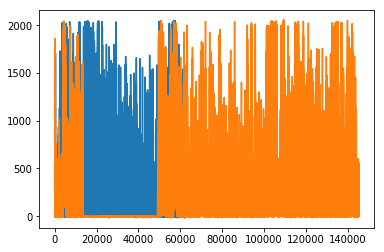

In [9]:
plt.plot(y_test)
plt.plot(y_train)

(145452, 1)
(145452, 1)


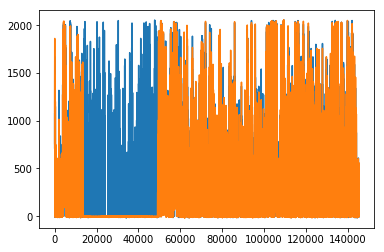

In [10]:
x_train_plot = np.array(x_turb_1_train.loc[:,['P_avg']])

plt.plot(x_train_plot)
plt.plot(y_train)

print(x_train_plot.shape)
print(y_train.shape)

In [11]:
y_train[20000:40000]

array([[-4.4699998],
       [-4.7199998],
       [-4.9699998],
       ...,
       [-1.73     ],
       [-1.12     ],
       [-1.       ]])

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 50713.79


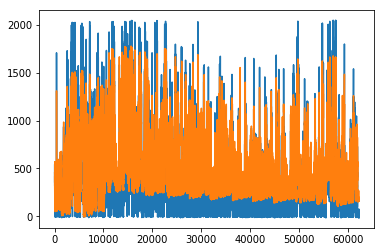

In [13]:
# Plotting them
plt.plot(y_test)
plt.plot(y_pred)

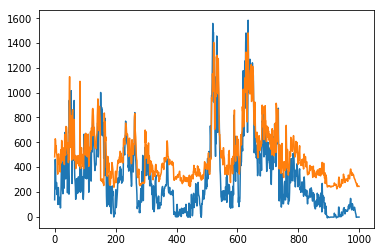

In [14]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])

### Doing prediction with no P_avg of turbine 1

Mean squared error: 71744.72


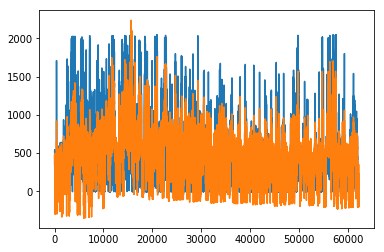

In [15]:
# Getting X vector from turbine 1 data sequentially
x_turb_1_train = turbines['turbine_1'][0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbines['turbine_1'][145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 2 data
y_turb_2_train = turbines['turbine_2'][0:145452]
y_turb_2_train = y_turb_2_train.loc[:,['P_avg']]
y_train = np.array(y_turb_2_train)

y_turb_2_test = turbines['turbine_2'][145452:]
y_turb_2_test = y_turb_2_test.loc[:,['P_avg']]
y_test = np.array(y_turb_2_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them

plt.plot(y_test)
plt.plot(y_pred)

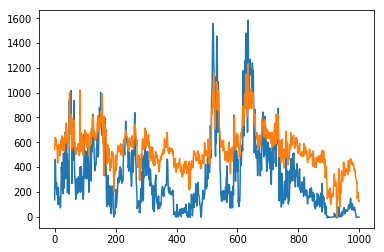

In [16]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])

Mean squared error: 38029.64


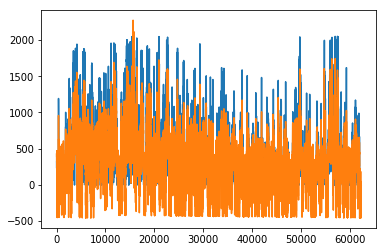

In [17]:
# Getting X vector from turbine 1 data sequentially
x_turb_1_train = turbines['turbine_1'][0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbines['turbine_1'][145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 3 data
y_turb_3_train = turbines['turbine_3'][0:145452]
y_turb_3_train = y_turb_3_train.loc[:,['P_avg']]
y_train = np.array(y_turb_3_train)

y_turb_3_test = turbines['turbine_3'][145452:]
y_turb_3_test = y_turb_3_test.loc[:,['P_avg']]
y_test = np.array(y_turb_3_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them
plt.plot(y_test)
plt.plot(y_pred)

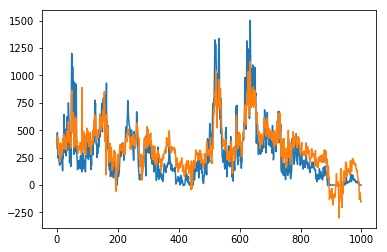

In [18]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])

### Trying other algorithms

In [ ]:
# SVM not working, so creating one vector for y_train

y_train_2 = np.hstack(y_train)

from sklearn.svm import SVR

clf = SVR(C=1.0,epsilon = 0.2)

clf.fit(x_train,y_train_2)

y_pred = clf.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them

plt.plot(y_test)
plt.plot(y_pred)